In [1]:
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import numpy as np
from collections import Counter
#import style
import matplotlib.pyplot as plt 
import numpy as np

cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 10)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']

#plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=15)
plt.rc('lines', markersize=6)
plt.rc('lines', linewidth=3)
plt.rc('legend', loc='best')
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', family='serif')

In [2]:
# Estruturas para armazenar informações
pid_neighbors_count = Counter()
rid_to_pid = defaultdict(set)

file_path = '/home/robert/Datas/Cores_fibrils/ts_8192_seed_6160.db' 

try:
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line.strip())
            if 'pid' in data and 'rid' in data:
                pid = data['pid']
                rid = data['rid']
                rid_to_pid[rid].add(pid)

                neigh_rids = data.get('neigh_rids', [])
                pid_neighbors_count[pid] = len(neigh_rids)

except Exception as e:
    print(f"Erro ao processar o arquivo: {e}")

# Agora somamos o número de vizinhos de todos os 'pids' para cada 'rid'
links_count = {rid: sum(pid_neighbors_count[pid] for pid in pids) for rid, pids in rid_to_pid.items()}

# Opcional: Salvar o resultado em um arquivo
output_file_path = 'saida_vizinhos_por_rid.json'
try:
    with open(output_file_path, 'w') as outfile:
        json.dump(links_count, outfile, indent=4)
    print(f"Dados salvos com sucesso em {output_file_path}")
except Exception as e:
    print(f"Erro ao salvar o arquivo: {e}")


# Em seguida, calculamos a distribuição desses números de vizinhos
distribution = Counter(links_count.values())
distribution

x = sorted(list(distribution.keys()))
y = np.array([distribution[i] for i in x])
y = y/sum(y)

Dados salvos com sucesso em saida_vizinhos_por_rid.json


In [3]:
import os
import json
from collections import defaultdict, Counter
import numpy as np

# Caminho para a pasta 'Core_fibrils'
directory_path = '/home/robert/Datas/Cores_fibrils'

# Dicionário para armazenar os resultados finais
final_results = defaultdict(lambda: defaultdict(int))

# Listando todos os arquivos no diretório
for filename in os.listdir(directory_path):
    if filename.startswith("ts_") and filename.endswith(".db"):
        ts_value = int(filename.split('_')[1].split('.')[0])  # Extraindo o valor de 'ts'

        file_path = os.path.join(directory_path, filename)
        
        # Inicializando as estruturas de dados para este arquivo
        pid_neighbors_count = Counter()
        rid_to_pid = defaultdict(set)

        # Processando o arquivo
        try:
            with open(file_path, 'r') as file:
                for line in file:
                    data = json.loads(line.strip())
                    if 'pid' in data and 'rid' in data:
                        pid = data['pid']
                        rid = data['rid']
                        rid_to_pid[rid].add(pid)

                        neigh_rids = data.get('neigh_rids', [])
                        pid_neighbors_count[pid] = len(neigh_rids)

            # Somando o número de vizinhos de todos os 'pids' para cada 'rid'
            links_count = {rid: sum(pid_neighbors_count[pid] for pid in pids) for rid, pids in rid_to_pid.items()}

            # Calculando a distribuição
            distribution = Counter(links_count.values())

            # Preparando os dados x e y
            x = sorted(distribution.keys())
            y = np.array([distribution[i] for i in x])
            

            # Agregando os resultados
            for x_val, y_val in zip(x, y):
                final_results[ts_value][x_val] += y_val

        except Exception as e:
            print(f"Erro ao processar o arquivo {filename}: {e}")

# Convertendo os resultados finais para uma forma mais fácil de usar
final_results = {ts: dict(values) for ts, values in final_results.items()}

# Exibindo os resultados
for ts, values in final_results.items():
    print(f"ts: {ts}, distribuição: {values}")


ts: 128, distribuição: {1: 25, 2: 127, 3: 160, 4: 203, 5: 4, 6: 177, 8: 161, 10: 63, 11: 50, 12: 82, 13: 26, 14: 89, 15: 84, 16: 148, 17: 32, 18: 169, 19: 18, 20: 239, 21: 13, 22: 140, 23: 33, 24: 259, 25: 34, 26: 247, 27: 31, 28: 302, 29: 23, 30: 370, 31: 18, 32: 409, 33: 42, 34: 436, 35: 15, 36: 536, 37: 20, 38: 681, 40: 727, 41: 32, 42: 788, 43: 15, 44: 961, 45: 26, 46: 1095, 47: 21, 48: 1159, 49: 22, 50: 1182, 52: 1315, 53: 10, 54: 1328, 56: 1402, 57: 10, 58: 1371, 59: 14, 60: 1460, 62: 1159, 63: 7, 64: 1003, 66: 642, 68: 397, 70: 148, 72: 29, 9: 9, 39: 32, 51: 18, 55: 11, 0: 12, 7: 9, 61: 6}
ts: 512, distribuição: {0: 9, 1: 14, 2: 72, 3: 146, 4: 194, 6: 185, 8: 149, 9: 4, 10: 45, 11: 36, 12: 60, 13: 20, 14: 68, 15: 48, 16: 110, 17: 22, 18: 115, 19: 7, 20: 226, 21: 15, 22: 99, 23: 18, 24: 209, 25: 22, 26: 166, 27: 56, 28: 222, 30: 246, 31: 11, 32: 283, 33: 32, 34: 346, 35: 23, 36: 419, 37: 25, 38: 495, 40: 523, 41: 21, 42: 737, 43: 31, 44: 779, 45: 20, 46: 878, 47: 20, 48: 1054, 49

In [4]:
final_results[128]

{1: 25,
 2: 127,
 3: 160,
 4: 203,
 5: 4,
 6: 177,
 8: 161,
 10: 63,
 11: 50,
 12: 82,
 13: 26,
 14: 89,
 15: 84,
 16: 148,
 17: 32,
 18: 169,
 19: 18,
 20: 239,
 21: 13,
 22: 140,
 23: 33,
 24: 259,
 25: 34,
 26: 247,
 27: 31,
 28: 302,
 29: 23,
 30: 370,
 31: 18,
 32: 409,
 33: 42,
 34: 436,
 35: 15,
 36: 536,
 37: 20,
 38: 681,
 40: 727,
 41: 32,
 42: 788,
 43: 15,
 44: 961,
 45: 26,
 46: 1095,
 47: 21,
 48: 1159,
 49: 22,
 50: 1182,
 52: 1315,
 53: 10,
 54: 1328,
 56: 1402,
 57: 10,
 58: 1371,
 59: 14,
 60: 1460,
 62: 1159,
 63: 7,
 64: 1003,
 66: 642,
 68: 397,
 70: 148,
 72: 29,
 9: 9,
 39: 32,
 51: 18,
 55: 11,
 0: 12,
 7: 9,
 61: 6}

In [5]:
final_results[2]

{0: 88,
 1: 67,
 2: 269,
 3: 31,
 4: 108,
 5: 34,
 6: 250,
 7: 17,
 8: 183,
 9: 26,
 10: 279,
 11: 28,
 12: 319,
 13: 17,
 14: 354,
 15: 19,
 16: 402,
 17: 11,
 18: 405,
 20: 463,
 22: 313,
 23: 11,
 24: 444,
 25: 10,
 26: 414,
 27: 8,
 28: 410,
 30: 393,
 31: 4,
 32: 339,
 34: 362,
 35: 5,
 36: 288,
 38: 280,
 39: 2,
 40: 223,
 42: 192,
 43: 3,
 44: 187,
 46: 152,
 48: 128,
 50: 86,
 52: 85,
 53: 1,
 54: 52,
 56: 52,
 58: 30,
 60: 26,
 66: 5,
 68: 3,
 19: 21,
 51: 1,
 62: 9,
 64: 7,
 21: 3,
 29: 5,
 33: 6,
 37: 5,
 61: 1,
 72: 1}

In [6]:
dist_ts = final_results[2]
print(dist_ts)
x = sorted(dist_ts.keys())
y = np.array([dist_ts[i] for i in x])
y_normalized = y / sum(y)

{0: 88, 1: 67, 2: 269, 3: 31, 4: 108, 5: 34, 6: 250, 7: 17, 8: 183, 9: 26, 10: 279, 11: 28, 12: 319, 13: 17, 14: 354, 15: 19, 16: 402, 17: 11, 18: 405, 20: 463, 22: 313, 23: 11, 24: 444, 25: 10, 26: 414, 27: 8, 28: 410, 30: 393, 31: 4, 32: 339, 34: 362, 35: 5, 36: 288, 38: 280, 39: 2, 40: 223, 42: 192, 43: 3, 44: 187, 46: 152, 48: 128, 50: 86, 52: 85, 53: 1, 54: 52, 56: 52, 58: 30, 60: 26, 66: 5, 68: 3, 19: 21, 51: 1, 62: 9, 64: 7, 21: 3, 29: 5, 33: 6, 37: 5, 61: 1, 72: 1}


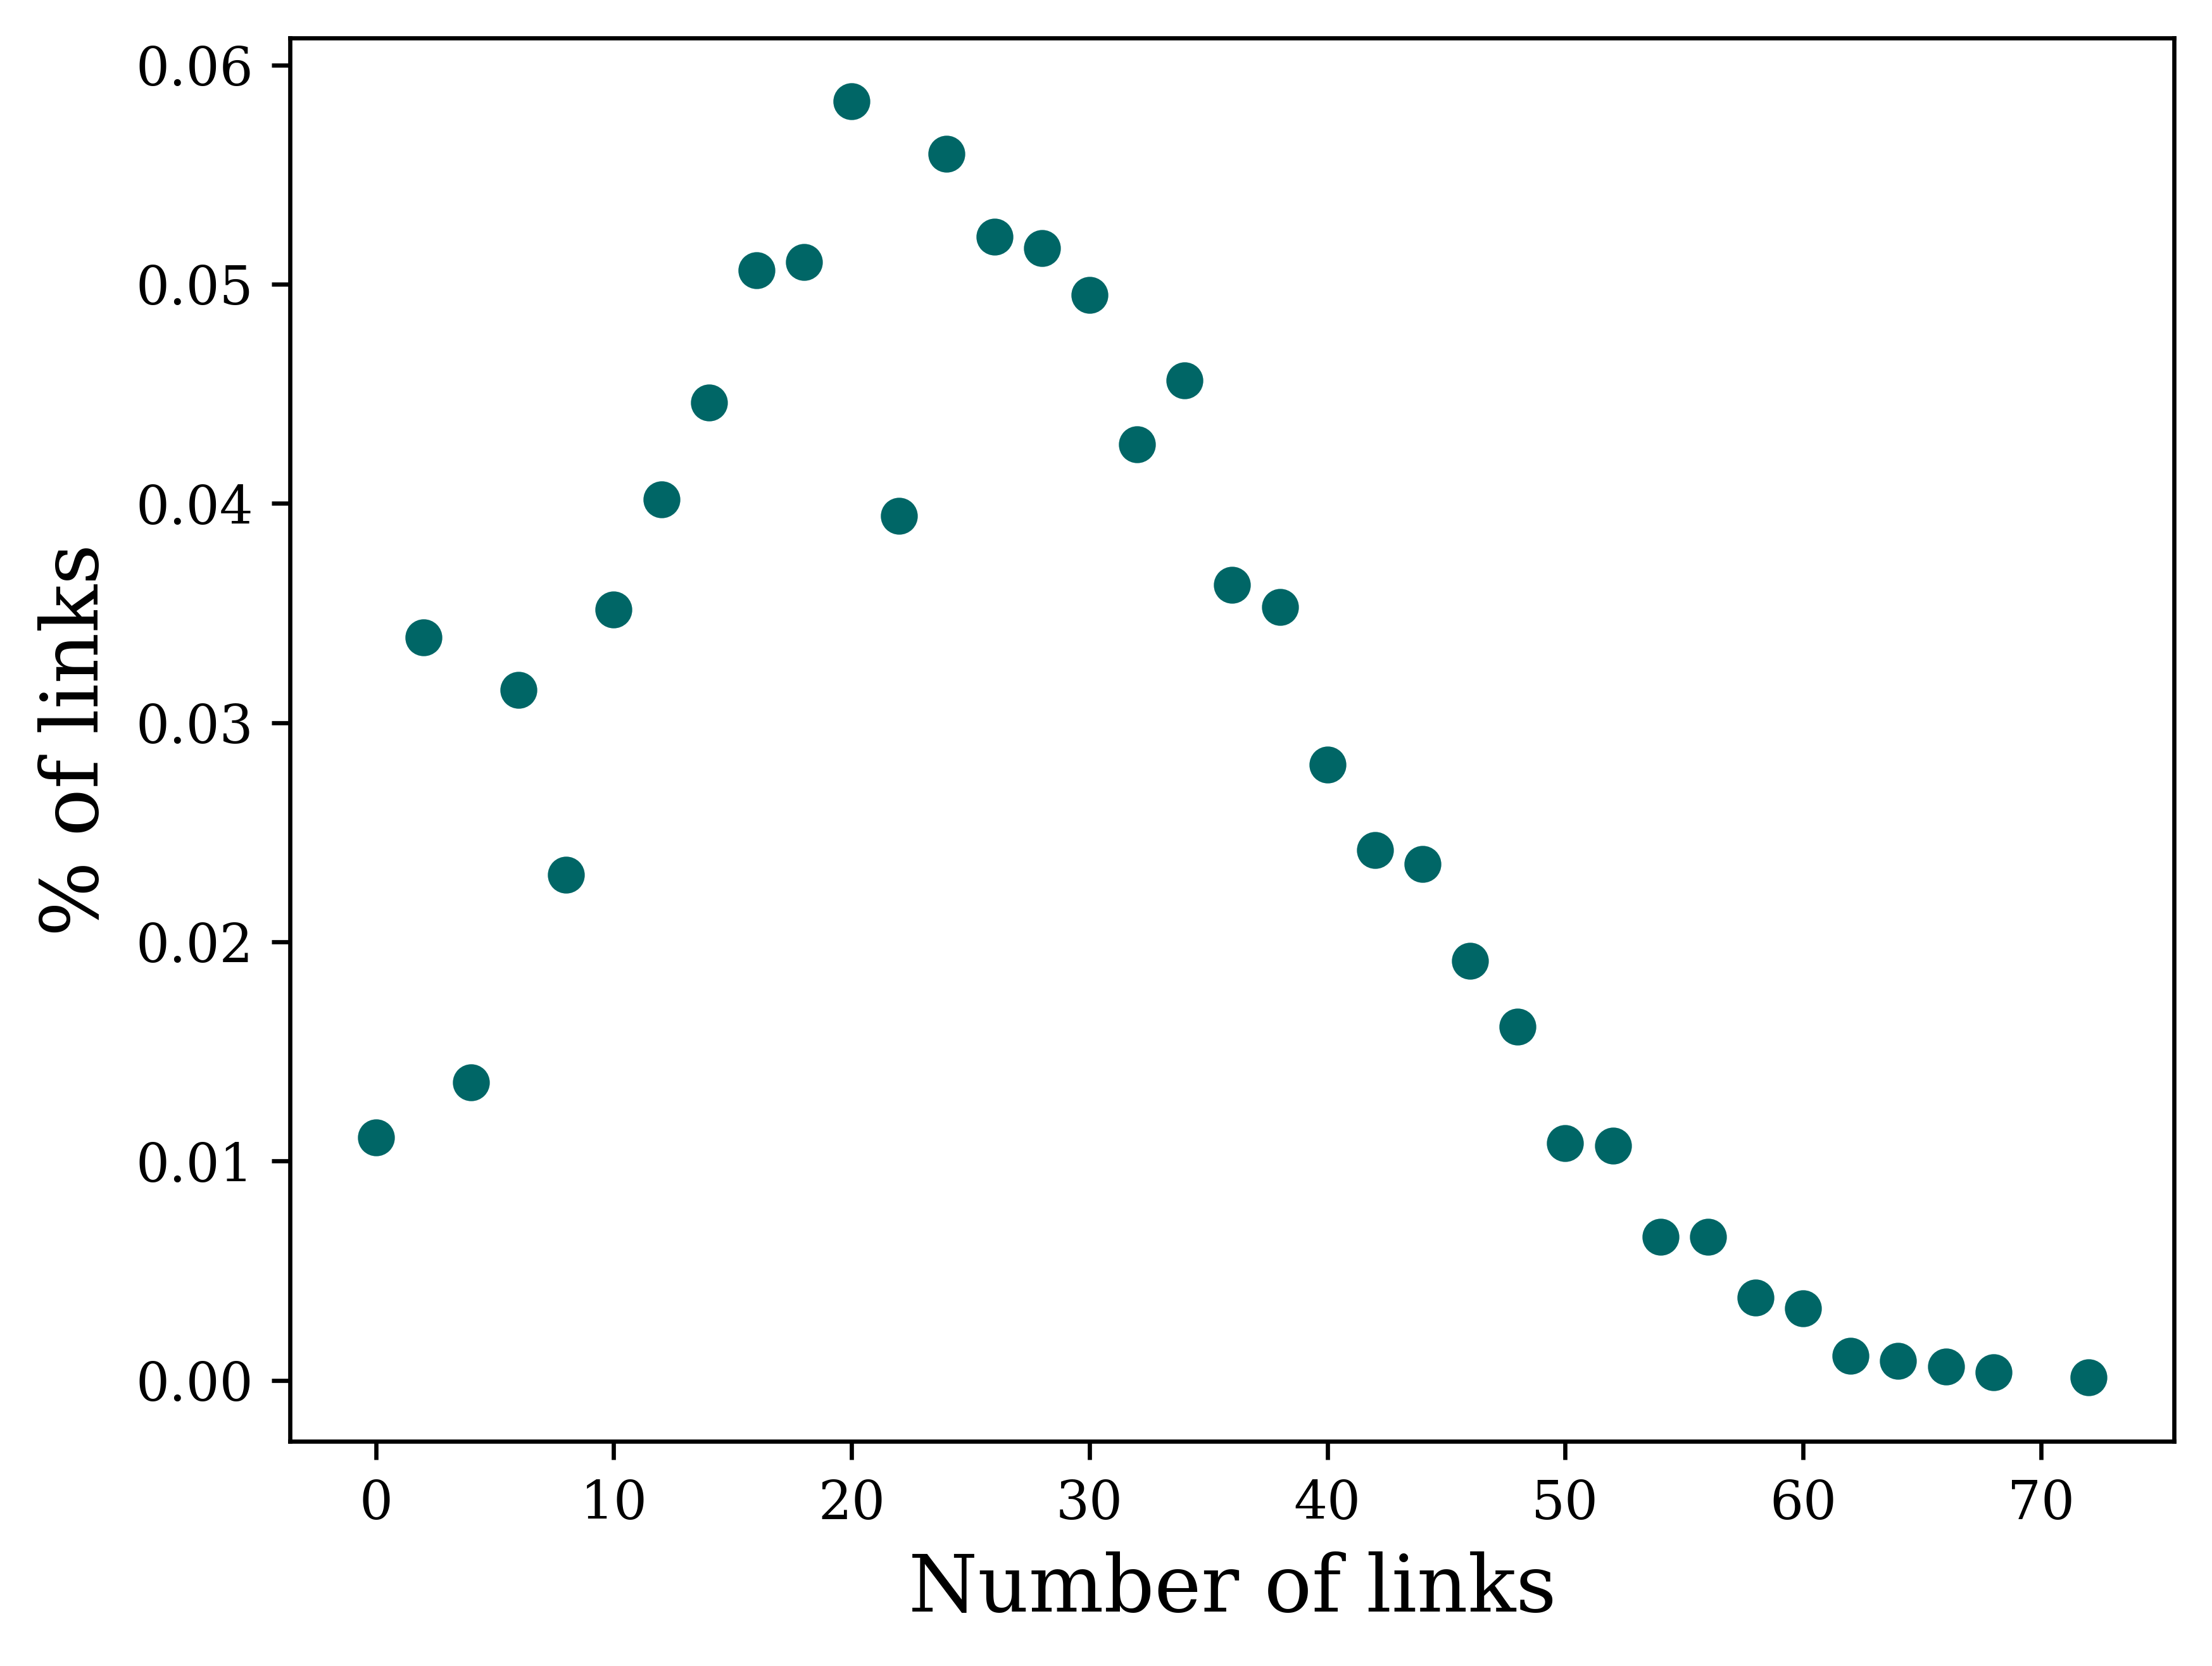

In [7]:
x = np.array(x)
plt.figure(dpi = 600)
plt.scatter(x[x%2 == 0], np.array(y_normalized)[x%2 == 0], color='#006666')
plt.xlabel("Number of links")
plt.ylabel("% of links")
plt.show()
